# TS5 - Estimación espectral: Ancho de banda de señales reales

### Autoras: Catalina Gonzalez Araujo y Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

12/10/2025

# I. **Introducción**
## Métodos de estimación espectral

En la práctica, el cálculo de la densidad espectral de potencia (PSD) es restringido, debido a que se cuenta con una cantidad de muestras y realizaciones limitadas del proceso aleatorio y generalmente se desconoce la función de probabilidad. Por ello, se utilizan diversos métodos de estimación espectral, que se detallan a continuación.

### Periodograma

Se define a x[n] como un proceso aleatorio de longitud infinita, con media 0 y WSS (wide-sense stationary), cuya autocorrelación $r_{xx}[l]$ es absolutamente sumable.
$$
\sum_{l=-\infty}^{\infty} |r_{xx}[l]| < \infty
$$

La densidad espectral de potencia (PDS) de x[n], $S_{xx}(\omega)$, se define mediante la DTFT de la función de autocorrelación.

$$
S_{xx}(\omega) \triangleq \mathcal{F}\{r_{xx}[l]\} = \sum_{l=-\infty}^{\infty} r_{xx}[l]e^{-j\omega l} \tag{14.6}
$$
El periodograma es un estimador de la densidad espectral de potencia basado en N mediciones sampleadas de x[n]. Se define mediante la siguiente ecuación:

$$
\hat{S}_{xx}(\omega,N)= \frac{1}{N} \mathcal{F}\{x[n]\} \cdot \mathcal{F}\{x[n-L]\} = \frac{1}{N} X_N(\omega) X_N^*(\omega) = \frac{1}{N} |X_N(\omega)|^2
$$

$$
= \left| \frac{1}{N} \sum_{n=0}^{N-1} x[n]e^{-j\omega n} \right|^2 \tag{14.15}
$$

Es un estimador con una alta varianza, por lo que se usan variantes mejoradas. 

### Método de Bartlet

El objetivo del método de Bartlett es hallar un estimador insesgado y consistente. Se fundamenta en la idea de que si se promedian M mediciones incorreladas de una variable aleatoria para formar la media muestral, la varianza de esta media disminuye en proporción a M.

Prácticamente, este método divide a la señal en bloques no solapados, calcula el espectro de cada uno y luego promedia los resultados. Reduce la varianza de la estimación a costa de una menor resolución espectral. Si se mejora la varianza k veces, se empeora la resolución espectral k veces. 

Su definición matemática es:

$$ P_B(\omega, L, M) \triangleq \frac{1}{M} \sum_{m=0}^{M-1} \left( \frac{1}{L} \sum_{n=0}^{N-1} x[n + mL] e^{-j\omega n} \right)^2  = \frac{1}{N} \sum_{m=0}^{M-1} \left( \sum_{n=0}^{N-1} x[n + mL] e^{-j\omega n}  \right)^2 $$ 

El valor esperado del periodograma promediado $P_B(ω;L;M)$ es el mismo que el del periodograma de un solo bloque (también es asintóticamente insesgado cuando L tiende a $\infty$)

$$
E (P_B(ω;L;M)) = E(\hat S_{xx} (ω;L))
$$

Si cada bloque es incorrelado y de igual varianza, entonces la varianza de la suma de M periodogramas es 1/M veces la varianza del periodograma de un bloque. Es decir, la varianza del estimador tiende a cero cuando M tiende a $\infty$

$$
var(P_B(ω;L;M))= \frac {1}{M}var(\hat S_{xx}(ω;L))
$$

### Método de Welch

Es equivalente a hacer el periodograma modificado promediado, pero se divide la secuencia de datos x[n] en M tramos de longitud L que se solapan en D puntos. En cada tramo, los datos se multiplican por una ventana y se calculan y promedian los periodogramas para formar el de Welch. Es decir, se basa en el método de Bartlett, pero los bloques se encuentran solapados y agrega ventaneo. Busca concentrar mejor la energía y evitar el desparramo espectral. Su definición matemática es:

$$ P_W(\omega, L, D, M) =  \frac{     \frac{1}{M} \sum_{m=0}^{M-1}      \left( \sum_{n=0}^{L-1} x[n + mD] w_L[n] e^{-j\omega n} \right)^2 }{     \sum_{n=0}^{L-1} w_L^2[n] } $$

Este método logra un estimador insesgado y consistente para la PDS, ya que combina el periodograma, el método de Bartlett y el periodograma modificado.


### Método de Blackman-Tukey

Estima la autocorrelación, la multiplica por una ventana para truncar retardos y calcula la FFT de la autocorrelación truncada. A continuación se detalla el procedimiento:

A partir de $N$ muestras de la señal $x[n]$, se calcula la autocorrelación estimada.
$$ 
\hat{R}_{xx}[k] = \frac{1}{N} \sum_{n=0}^{N - |k| - 1} x[n] \cdot x[n - |k|], \quad \text{con } -(N - 1) \leq k \leq N - 1 
$$

Se obtiene una función discreta y finita. Para evitar problemas al estimar la autocorrelación hasta retardos muy grandes (donde la estimación es ruidosa), se multiplica por una ventana simétrica $w[k]$ de longitud $M$:

$$
R_{xx}[k]=w[k] \hat R_{xx}[k]
$$

Esto reduce la varianza, pero introduce sesgo (se pierde información de retardos grandes).


Se calcula la transformada discreta de Fourier (DFT) de la autocorrelación truncada:

$$
\hat{S}_{xx}(f) = \sum_{k=-M}^{M} R_{xx}[k] \, e^{-j 2\pi f k} 
$$

Al truncar la autocorrelación, se suaviza el espectro, es decir, menos varianza en el estimador, pero menos resolución. La forma de la ventana controla el compromiso entre resolución espectral y reducción de ruido. Es decir, este método es un promediado espectral pero hecho en el dominio del tiempo antes de pasar a frecuencia.

## Tipos de señales

En este trabajo se analizaron tres tipos de señales:

- Electrocardiograma (ECG): refleja la actividad del corazón.

- Pletismografía (PPG): mide variaciones de volumen sanguíneo.

- Señales de audio: comprenden tanto voz como silbidos, y se caracterizan por un espectro más amplio.

El objetivo principal es estimar la densidad espectral de potencia de cada señal, utilizando alguno de los métodos mencionados y, a partir de dicha estimación, determinar su ancho de banda efectivo. Esto permitirá comparar cuantitativamente las características espectrales de las distintas señales analizadas.

## Ancho de banda

El ancho de banda de una señal se define como el rango de frecuencias dentro del cual se concentra la mayor parte de su energía o potencia espectral.

Puede definirse de distintas maneras según el criterio adoptado:

- Ancho de banda de potencias (en dB): Es el intervalo de frecuencias comprendido entre los puntos en los que la densidad espectral de potencia (PSD) cae a la mitad de su valor máximo (-3 dB respecto del máximo).

- Ancho de banda efectivo o de energía: Es el rango de frecuencias que contiene un porcentaje determinado de la energía total de la señal (entre el 95% y el 99%), considerando que el resto se asocia a otras fuentes de interferencia o ruido.

En ambos casos, el ancho de banda describe la porción significativa del espectro donde la señal tiene contenido útil para su análisis, y fuera de ese rango las contribuciones en frecuencia pueden considerarse despreciables.

# II. **Desarrollo**

En primer lugar, se sintetizaron las señales y se realizaron los respectivos gráficos.

In [1]:
# %% Imports
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

Text(0.5, 1.0, 'ecg sin ruido')

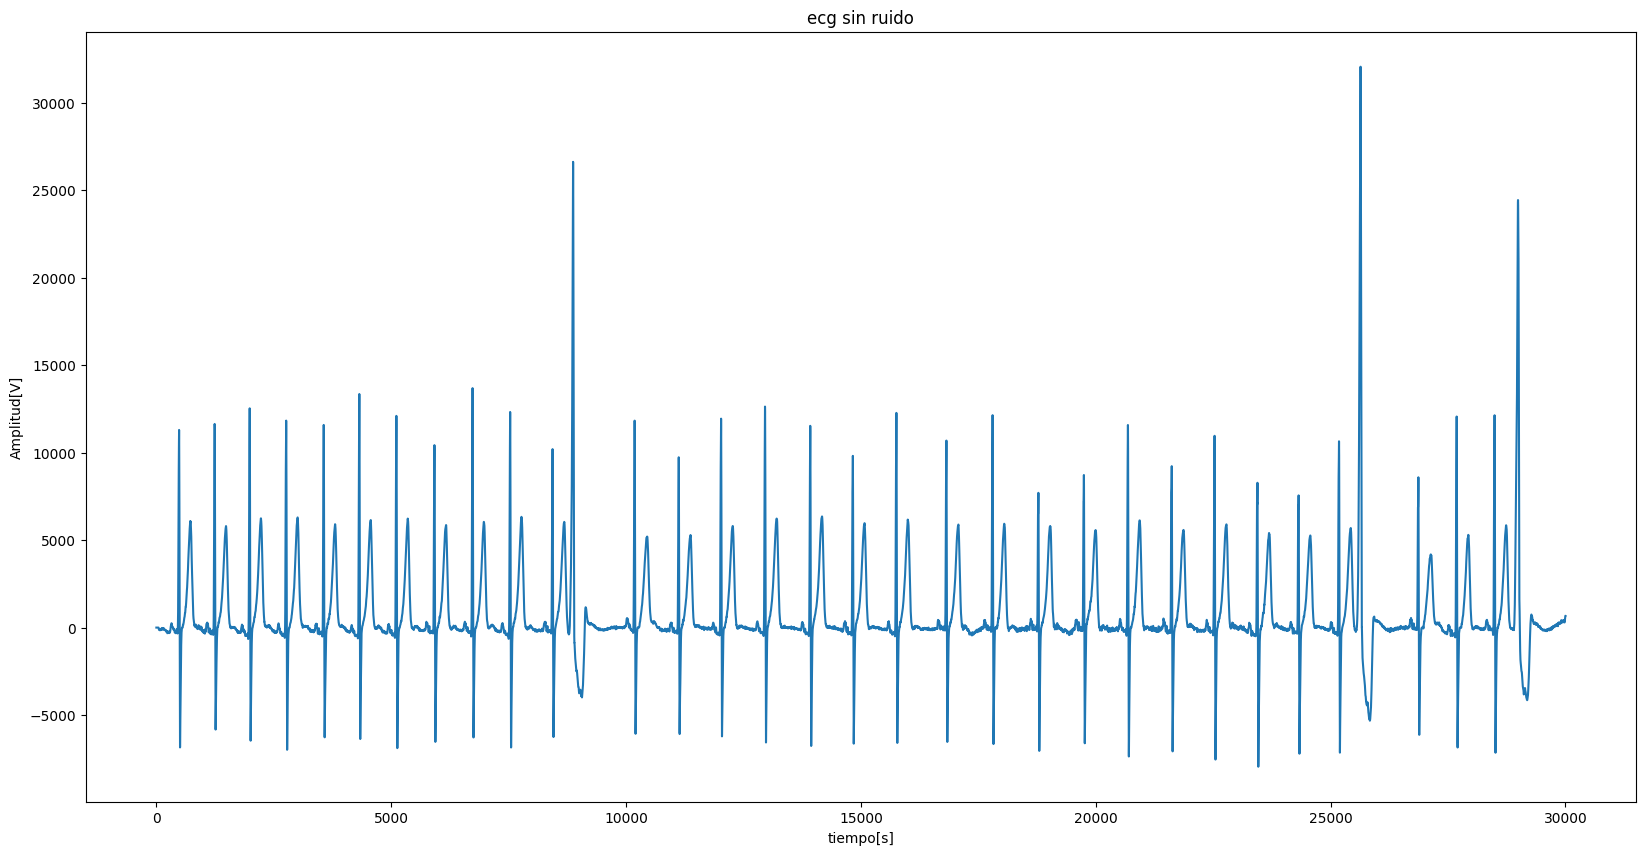

In [8]:
##################
# Lectura de ECG #
##################

fs_ecg = 1000 # Hz


ecg_one_lead = np.load('ecg_sin_ruido.npy')

plt.figure(figsize=(20,10))
plt.xlabel('tiempo[s]')
plt.ylabel('Amplitud[V]')
plt.plot(ecg_one_lead)
plt.title('ecg sin ruido')



Text(0.5, 1.0, 'ppg sin ruido')

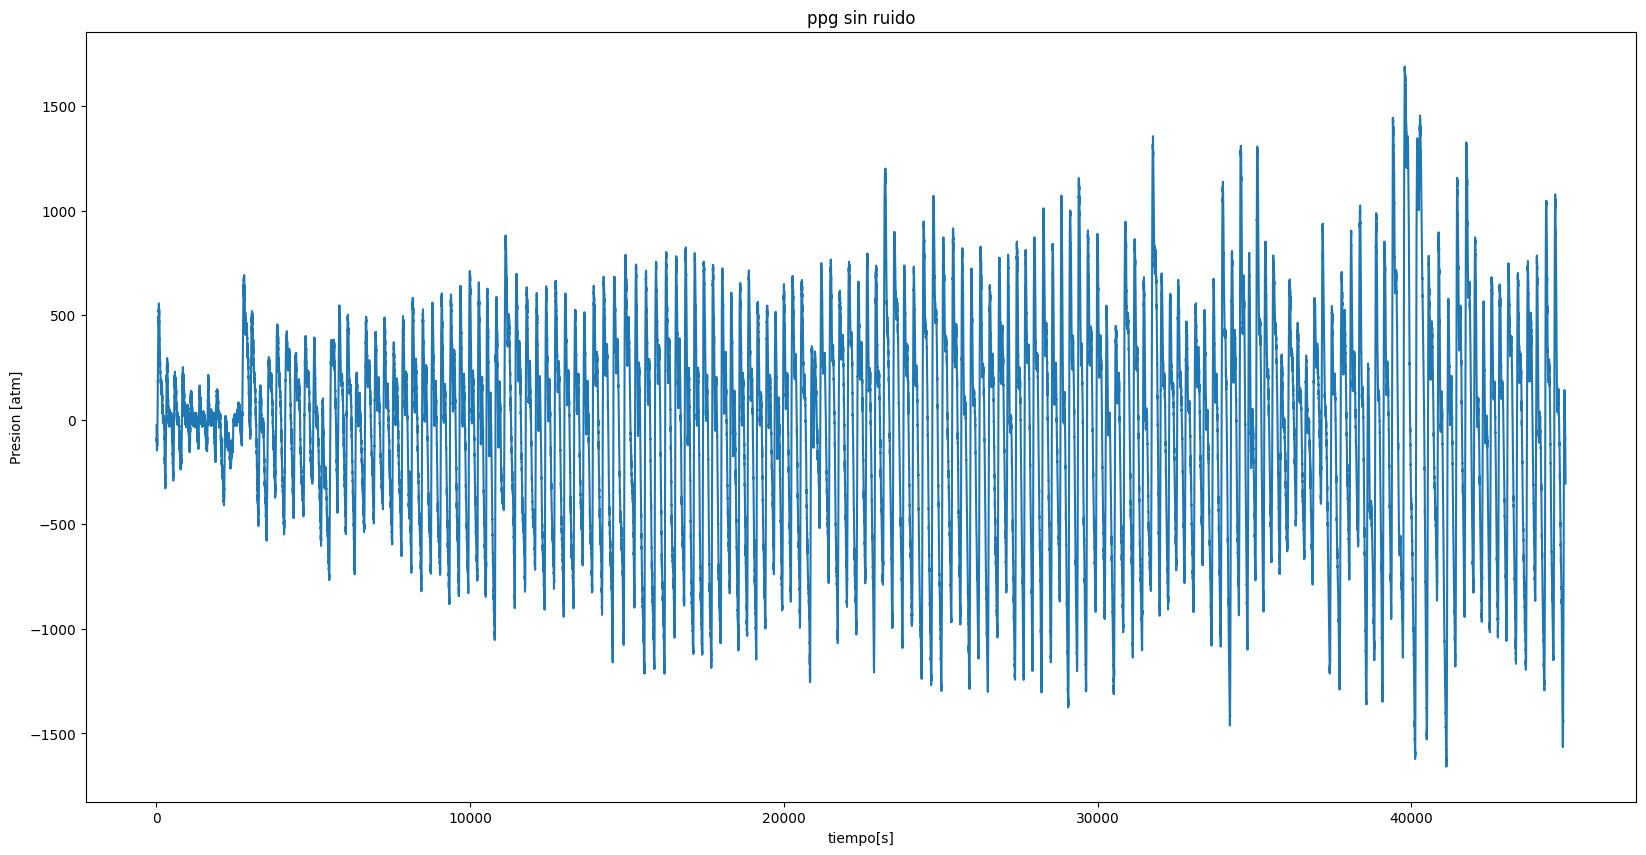

In [9]:
#%%

####################################
# Lectura de pletismografía (PPG)  #
#senal proporcional a la cant de oxigeno que tenes en sangre en el tejido capilar
####################################

fs_ppg = 400 # Hz
##################
## PPG sin ruido
##################

ppg = np.load('ppg_sin_ruido.npy')

plt.figure(figsize=(20,10))
plt.xlabel('tiempo[s]')
plt.ylabel('Presion [atm]')
plt.plot(ppg)
plt.title('ppg sin ruido')


Text(0.5, 1.0, 'la cucaracha')

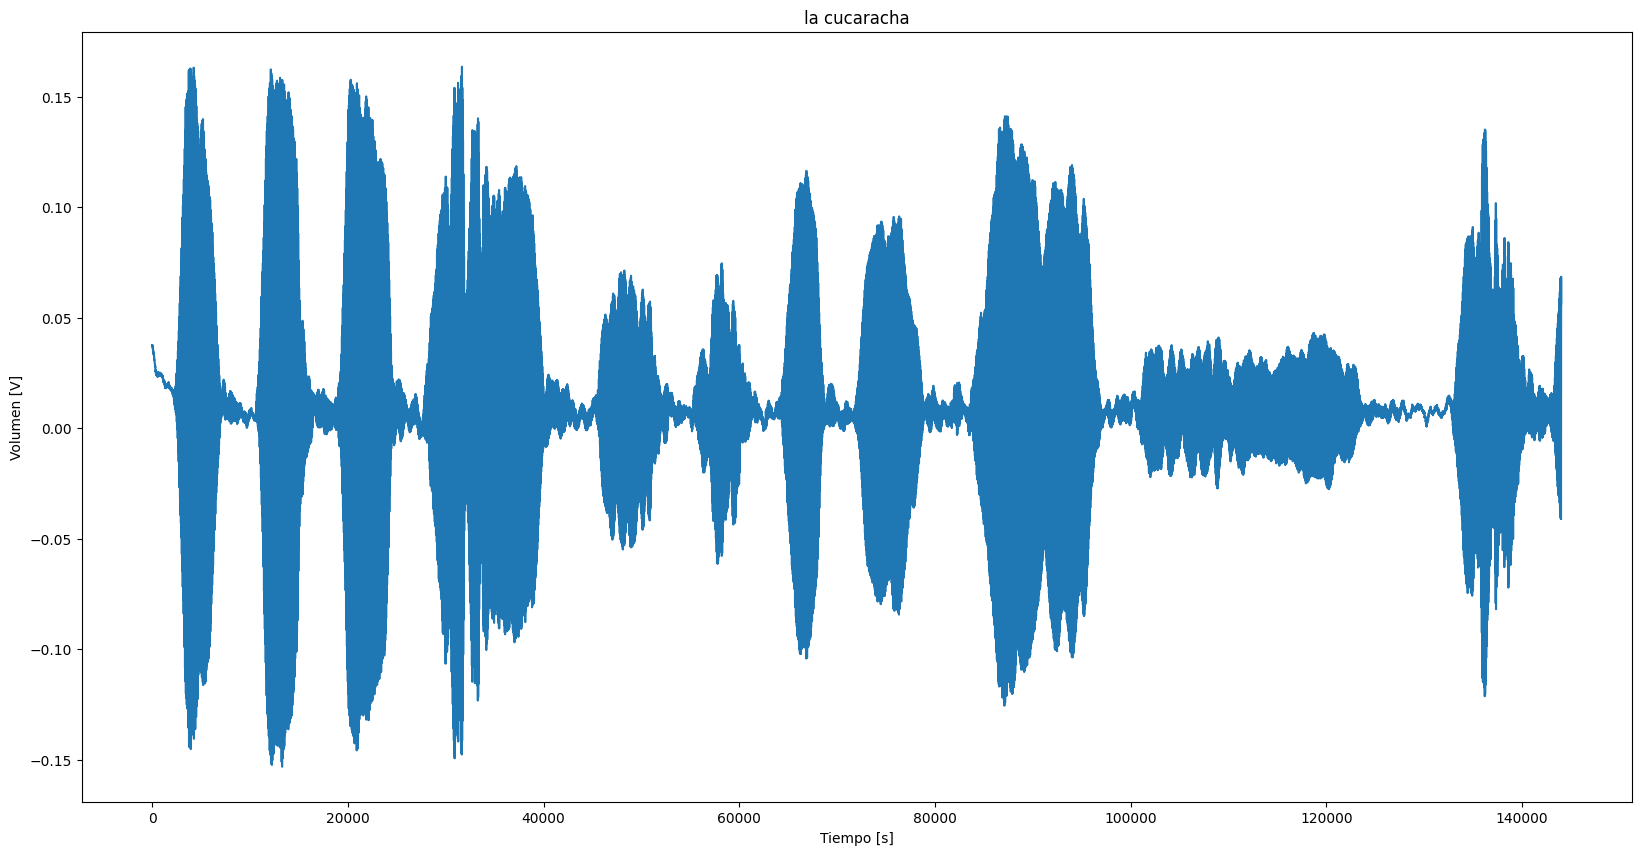

In [10]:
#%%

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
# fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
# fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure(figsize=(20,10))
plt.title('Audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Volumen [V]')
plt.plot(wav_data)
plt.title('la cucaracha')

# III. **Conclusiones**